In [ ]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

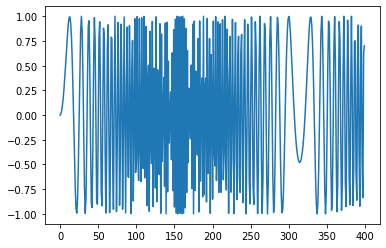

In [ ]:
#Generating synthetic data of the form sin(kt^2)
series = np.sin((0.1*np.arange(400))**2)

# plot it
plt.plot(series)
plt.show()

In [ ]:
# Building our dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


Autoregressive linear model

In [ ]:
#Autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)

model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.01),
)

# train the model
r = model.fit(
  X[:N//2], Y[:N//2],
  epochs=80,
  validation_data=(X[N//2:], Y[N//2:]),
)

Epoch 1/80
7/7 [==============================] - 3s 30ms/step - loss: 1.4286 - val_loss: 1.0022
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 1.2273 - val_loss: 0.9441
Epoch 3/80
7/7 [==============================] - 0s 9ms/step - loss: 1.0850 - val_loss: 0.8911
Epoch 4/80
7/7 [==============================] - 0s 9ms/step - loss: 0.9667 - val_loss: 0.8471
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 0.8690 - val_loss: 0.8008
Epoch 6/80
7/7 [==============================] - 0s 8ms/step - loss: 0.7882 - val_loss: 0.7638
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.7239 - val_loss: 0.7136
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.6699 - val_loss: 0.6787
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.6321 - val_loss: 0.6546
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.6005 - val_loss: 0.6374
Epoch 11/80
7/7 [================

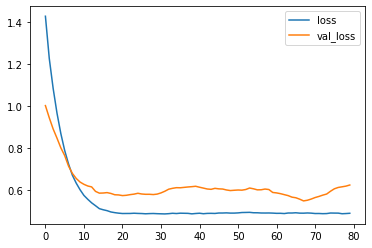

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

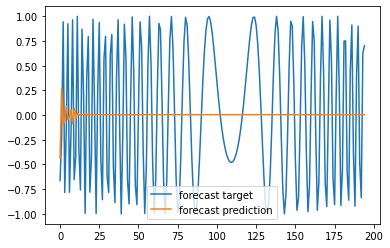

In [ ]:
# Forecasting future values
validation_target = Y[N//2:]
validation_predictions = []

# first validation input
last_x = X[N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

SimpleRNN

In [ ]:
# RNN/LSTM/GRU model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = SimpleRNN(10)(i) #Change this line to LSTM(10)(i) to try LSTM
x = Dense(1)(x)

model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.05),
)

# train the RNN
r = model.fit(
  X[:N//2], Y[:N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[N//2:], Y[N//2:]),
)

Epoch 1/200
7/7 [==============================] - 2s 62ms/step - loss: 0.5750 - val_loss: 0.6503
Epoch 2/200
7/7 [==============================] - 0s 22ms/step - loss: 0.5183 - val_loss: 0.4904
Epoch 3/200
7/7 [==============================] - 0s 22ms/step - loss: 0.5016 - val_loss: 0.4944
Epoch 4/200
7/7 [==============================] - 0s 21ms/step - loss: 0.4247 - val_loss: 0.5852
Epoch 5/200
7/7 [==============================] - 0s 27ms/step - loss: 0.3530 - val_loss: 0.4365
Epoch 6/200
7/7 [==============================] - 0s 30ms/step - loss: 0.2753 - val_loss: 0.2371
Epoch 7/200
7/7 [==============================] - 0s 21ms/step - loss: 0.2058 - val_loss: 0.2694
Epoch 8/200
7/7 [==============================] - 0s 23ms/step - loss: 0.1619 - val_loss: 0.1564
Epoch 9/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2542 - val_loss: 0.1181
Epoch 10/200
7/7 [==============================] - 0s 28ms/step - loss: 0.2220 - val_loss: 0.2814
Epoch 11/200
7/7 [=

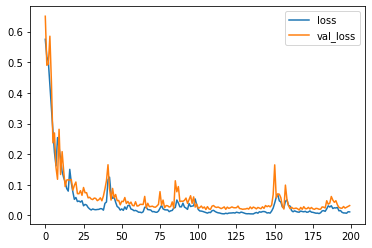

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

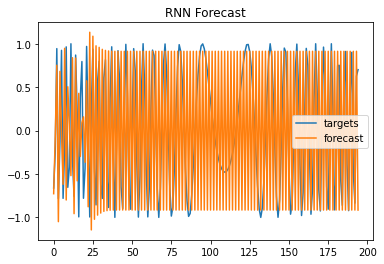

In [ ]:
#Forecasting future value
forecast = []
input_ = X[N//2]
while len(forecast) < len(Y[N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()

LSTM and GRU

In [ ]:
# LSTM/GRU model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i) #Change this line to LSTM(10)(i) to try LSTM
x = Dense(1)(x)

model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.05),
)

# train the RNN
r = model.fit(
  X[:N//2], Y[:N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[N//2:], Y[N//2:]),
)

Epoch 1/200
7/7 [==============================] - 4s 85ms/step - loss: 0.5322 - val_loss: 0.6068
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5236 - val_loss: 0.5362
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.5437 - val_loss: 0.5046
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.5012 - val_loss: 0.5169
Epoch 5/200
7/7 [==============================] - 0s 20ms/step - loss: 0.4773 - val_loss: 0.5225
Epoch 6/200
7/7 [==============================] - 0s 13ms/step - loss: 0.4072 - val_loss: 0.5061
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3035 - val_loss: 0.3700
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2091 - val_loss: 0.5242
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2293 - val_loss: 0.2556
Epoch 10/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1662 - val_loss: 0.2016
Epoch 11/200
7/7 [=

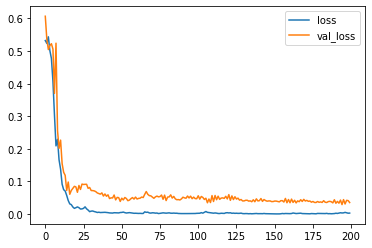

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

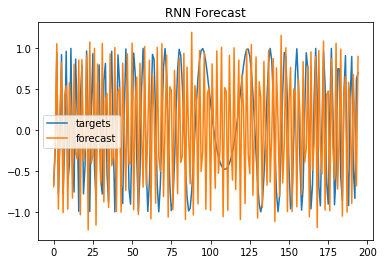

In [ ]:
#Forecasting future value
forecast = []
input_ = X[N//2]
while len(forecast) < len(Y[N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()

GRU

Epoch 1/200
7/7 [==============================] - 3s 89ms/step - loss: 0.6133 - val_loss: 0.6251
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 0.5198 - val_loss: 0.5242
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5060 - val_loss: 0.5691
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5001 - val_loss: 0.5776
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4928 - val_loss: 0.5888
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4805 - val_loss: 0.5903
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4625 - val_loss: 0.5655
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4136 - val_loss: 0.5450
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3401 - val_loss: 0.4427
Epoch 10/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3192 - val_loss: 0.4622
Epoch 11/200
7/7 [=

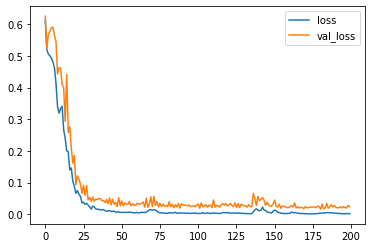

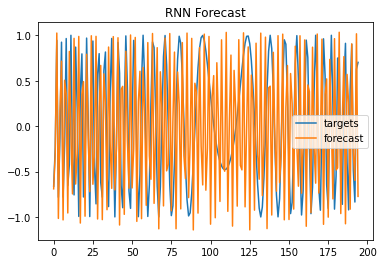

In [ ]:
# RNN/LSTM/GRU model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = GRU(10)(i) #Change this line to LSTM(10)(i) to try LSTM
x = Dense(1)(x)

model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.05),
)

# train the RNN
r = model.fit(
  X[:N//2], Y[:N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[N//2:], Y[N//2:]),
)

# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

#Forecasting future value
forecast = []
input_ = X[N//2]
while len(forecast) < len(Y[N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()